* By: Illya Barziy
* Email: illyabarziy@gmail.com
* Reference: __Some contributions to the clustering of financial time series and applications to credit default swaps__ _by_ Gautier Marti

## GPR and GNPR distances

This description is based on the paper by _Gautier Marti_ __“Some contributions to the clustering of financial time series and applications to credit default swaps”__  [available here](https://www.researchgate.net/publication/322714557).

### Classification of distances

According to _Gautier Marti_:

"Many statistical distances exist to measure the dissimilarity of two random variables, and therefore two i.i.d. random processes. Such distances can be roughly classified in two
families:

1. distributional distances, ... which focus on dissimilarity between probability distributions and quantify divergences in marginal behaviours,

2. dependence distances, such as the distance correlation or copula-based kernel dependency measures ..., which focus on the joint behaviours of random variables, generally ignoring their distribution properties.

However, we may want to be able to discriminate random variables both on distribution and dependence. This can be motivated, for instance, from the study of financial assets returns: are two perfectly correlated random variables (assets returns), but one being normally distributed and the other one following a heavy-tailed distribution, similar?

From risk perspective, the answer is no ..., hence the propounded distance of this article".

### GPR distance

From __“Some contributions to the clustering of financial time series and applications to credit default swaps”__ :

__Definition:__ (Distance $d_{\Theta}$ between two random variables). Let $\theta \in [0, 1]$. Let $(X, Y) \in \nu^{2}$ , where $\nu$ is the space of all continuous
real-valued random variables. Let $G = (G_{X}, G_{Y})$, where $G_{X}$ and $G_{Y}$ are respectively $X$ and $Y$ marginal cdfs. We define the following distance

$$d_{\Theta}^{2}(X, Y) = \Theta d_{1}^{2}(G_{X}(X), G_{Y}(Y)) + (1 - \Theta) d_{0}^{2}(G_{X}, G_{Y})$$

where

$$d_{1}^{2}(G_{X}(X), G_{Y}(Y)) = 3 \mathbb{E}[|G_{X}(X) - G_{Y}(Y)|^{2}]$$

and

$$d_{0}^{2}(G_{X}, G_{Y}) = \frac{1}{2} \int_{R} (\sqrt{\frac{d G_{X}}{d \lambda}} - \sqrt{\frac{d G_{Y}}{d \lambda}})^{2} d \lambda$$

__Example:__ (Distance $d_{\Theta}$ between two Gaussians). Let $(X, Y)$ be a bivariate Gaussian vector, with $X \sim \mathcal{N}(\mu_{X}, \sigma_{X}^{2})$,
$Y \sim \mathcal{N}(\mu_{Y}, \sigma_{Y}^{2})$ and $\rho (X,Y)$. We obtain,

$$d_{\Theta}^{2}(X, Y) = \Theta \frac{1 - \rho_{S}}{2} + (1 - \Theta) (1 - \sqrt{\frac{2 \sigma_{X} \sigma_{Y}}{\sigma_{X}^{2} + \sigma_{Y}^{2}}} e^{ - \frac{1}{4} \frac{(\mu_{X} - \mu_{Y})^{2}}{\sigma_{X}^{2} + \sigma_{Y}^{2}}})$$

The use of this distance is referenced as the generic parametric representation (GPR) approach.

From the paper:

"GPR distance is a fast and good proxy for distance $d_{\Theta}$ when the first two moments $\mu$ and ${\sigma}$ predominate. Nonetheless, for datasets which contain heavy-tailed distributions, GPR fails to capture this information".

__Property:__ Let $\Theta \in [0,1]$. The distance $d_{\Theta}$verifies $0 \le d_{\Theta} \le 1$.

__Property:__ For $0 < \Theta < 1$, $d_{\Theta}$ is a metric.

__Property:__ [Diffeomorphism](https://en.wikipedia.org/wiki/Diffeomorphism) invariance. Let $h: \nu \rightarrow \nu$ be a diffeomorphism. Let $(X, Y) \in \nu^{2}$. Distance $d_{\Theta}$ is invariant under diffeomorphism, i.e.

$$d_{\Theta}(h(X), h(Y)) = d_{\Theta}(X, Y)$$

### GNPR distance

According to _Marti_:

"To apply the propounded distance $d_{\Theta}$ on sampled data without parametric assumptions, we have to define its statistical estimate $\tilde{d}_{\Theta}$ working on realizations of the i.i.d. random variables.

Distance $d_{1}$ working with continuous uniform distributions can be approximated by normalized rank statistics yielding to discrete uniform distributions.

Distance $d_{0}$ working with densities can be approximated by using its discrete form working on histogram density estimates".

__Definition:__ (Empirical distance) Let $(X^{t})_{t=1}^{T}$ and $(Y^{t})_{t=1}^{T}$ be $T$ realizations of real-valued random variables $X, Y \in \nu$ respectively. An empirical distance between realizations of random variables can be defined by

$$\tilde{d}_{\Theta}^{2}((X^{t})_{t=1}^{T}, (Y^{t})_{t=1}^{T}) \stackrel{\text{a.s.}}{=} \Theta \tilde{d}_{1}^{2} + (1 - \Theta) \tilde{d}_{0}^{2}$$

where

$$\tilde{d}_{1}^{2} = \frac{3}{T(T^{2} - 1)} \sum_{t = 1}^{T} (X^{(t)} - Y^{(t)}) ^ {2}$$

and

$$\tilde{d}_{0}^{2} = \frac{1}{2} \sum_{k = - \infty}^{+ \infty} (\sqrt{g_{X}^{h}(hk)} - \sqrt{g_{Y}^{h}(hk)})^{2}$$

$h$ being here a suitable bandwidth, and $g_{X}^{h}(x) = \frac{1}{T} \sum_{t = 1}^{T} \mathbf{1}(\lfloor \frac{x}{h} \rfloor h \le X^{t} < (\lfloor \frac{x}{h} \rfloor + 1)h)$ being a density histogram estimating dpf $g_{X}$ from
$(X^{t})_{t=1}^{T}$ , $T$ realization of a random variable $X \in \nu$.


The use of this distance is referenced as the generic non-parametric representation (GNPR) approach.

From the paper:

"To use effectively $d_{\Theta}$ and its statistical estimate, it boils down to select a particular value for $\Theta$. We suggest here an exploratory approach where one can test 

- (i) distribution information ($\Theta = 0$),
- (ii) dependence information ($\Theta = 1$), and
- (iii) a mix of both information ($\Theta = 0.5$).

Ideally, $\Theta$ should reflect the balance of dependence and distribution information in the data.

In a supervised setting, one could select an estimate $\hat{\Theta}$ of the right balance $\Theta^{*}$ optimizing some loss function by techniques such as cross-validation. Yet, the lack of a clear loss function makes the estimation of $\Theta^{*}$ difficult in an unsupervised setting".

## Usage of the algorithms

This part shows how the GPR and the GNPR distances can be used to measure codependence between a set of stocks

In [1]:
import mlfinlab as ml
import pandas as pd
import seaborn as sns

In [2]:
# Loading the dataset of stocks
stocks = pd.read_csv('../../Sample-Data/stock_prices.csv')
stocks.set_index('Date', inplace=True)
stocks.index = pd.to_datetime(stocks.index)

# Taking first 10 stocks for better output visualization
stocks = stocks.iloc[:,0:10]
stocks.head()

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE
Date,,,,,,,,,,
2008-01-02,49.273335,35.389999,106.639999,52.919998,78.220001,87.629997,37.939999,47.759998,41.299999,79.500000
2008-01-03,49.716667,35.290001,107.000000,53.119999,78.349998,87.809998,37.919998,48.060001,42.049999,80.440002
2008-01-04,48.223331,34.599998,106.970001,51.759998,76.570000,88.040001,36.990002,46.919998,40.779999,77.500000
2008-01-07,48.576668,34.630001,106.949997,51.439999,76.650002,88.199997,37.259998,47.060001,40.220001,77.199997
2008-01-08,48.200001,34.389999,107.029999,51.320000,76.220001,88.389999,36.970001,46.400002,39.599998,75.849998


In [3]:
# Calculating returns of a given dataset of stocks

# Class containing needed function
ret_est = ml.portfolio_optimization.ReturnsEstimation()

# Calculating returns
stocks_returns = ret_est.calculate_returns(stocks)
stocks_returns.iloc[:,0:10].head()

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE
Date,,,,,,,,,,
2008-01-03,0.008997,-0.002826,0.003376,0.003779,0.001662,0.002054,-0.000527,0.006281,0.018160,0.011824
2008-01-04,-0.030037,-0.019552,-0.000280,-0.025602,-0.022719,0.002619,-0.024525,-0.023720,-0.030202,-0.036549
2008-01-07,0.007327,0.000867,-0.000187,-0.006182,0.001045,0.001817,0.007299,0.002984,-0.013732,-0.003871
2008-01-08,-0.007754,-0.006930,0.000748,-0.002333,-0.005610,0.002154,-0.007783,-0.014025,-0.015415,-0.017487
2008-01-09,0.032780,0.003199,-0.000747,0.021824,0.007216,-0.001584,0.002975,0.000431,0.006313,0.013184


In [4]:
# Calculating GPR distance between two tickers - EEM and EWG
gpr_dist = ml.codependence.gpr_distance(stocks_returns['EEM'], stocks_returns['EWG'], theta=0.5)
print('GPR distance between EEM and EWG measuring a mix of distribution and dependence information is: ', gpr_dist)

GPR distance between EEM and EWG measuring a mix of distribution and dependence information is:  0.24303211776227326


In [5]:
# Calculating GPR distance between two tickers - EEM and EWG using only dependence information
gpr_dist = ml.codependence.gpr_distance(stocks_returns['EEM'], stocks_returns['EWG'], theta=1)
print('GPR distance between EEM and EWG measuring dependence information is: ', gpr_dist)

GPR distance between EEM and EWG measuring dependence information is:  0.33908616627992194


In [6]:
# Calculating GNPR distance between two tickers - EEM and EWG
gpr_dist = ml.codependence.gnpr_distance(stocks_returns['EEM'], stocks_returns['EWG'], theta=0.5)
print('GNPR distance between EEM and EWG measuring a mix of distribution and dependence information is: ', gpr_dist)

GNPR distance between EEM and EWG measuring a mix of distribution and dependence information is:  0.04942613292915897


In [7]:
# Calculating GNPR distance between two tickers - EEM and EWG using only distribution information and 0.1 width of bins
gpr_dist = ml.codependence.gnpr_distance(stocks_returns['EEM'], stocks_returns['EWG'], theta=0, bandwidth=0.1)
print('GNPR distance between EEM and EWG measuring distribution information is: ', gpr_dist)

GNPR distance between EEM and EWG measuring distribution information is:  0.011284701054010133


These codependence measures can also be used on the whole dataframes, the results will be codependence matrices.

In [8]:
# Calculating GPR distance between all stocks with Θ = 0.5
gpr_matrix = ml.codependence.get_dependence_matrix(stocks_returns, dependence_method='gpr_distance',theta=0.5)

print('GPR distance matrix measuring a mix of distribution and dependence information:')
gpr_matrix

GPR distance matrix measuring a mix of distribution and dependence information:


,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE
EEM,0.000000,0.243032,6.917055e-01,3.080851e-01,2.167705e-01,0.723287,0.236127,0.238692,0.257452,2.641690e-01
EWG,0.243032,0.000000,6.834031e-01,3.000441e-01,1.501956e-01,0.711702,0.128455,0.206135,0.263928,2.838520e-01
TIP,0.691705,0.683403,7.450581e-09,6.484753e-01,6.659399e-01,0.246630,0.684698,0.669975,0.665189,6.800092e-01
EWJ,0.308085,0.300044,6.484753e-01,7.450581e-09,2.249911e-01,0.672096,0.294697,0.290073,0.313528,3.394935e-01
EFA,0.216770,0.150196,6.659399e-01,2.249911e-01,7.450581e-09,0.697111,0.128454,0.145634,0.233819,2.671068e-01
IEF,0.723287,0.711702,2.466302e-01,6.720957e-01,6.971110e-01,0.000000,0.712834,0.699468,0.697503,7.136660e-01
EWQ,0.236127,0.128455,6.846981e-01,2.946971e-01,1.284544e-01,0.712834,0.000000,0.187420,0.260472,2.757699e-01
EWU,0.238692,0.206135,6.699747e-01,2.900728e-01,1.456335e-01,0.699468,0.187420,0.000000,0.251571,2.735926e-01
XLB,0.257452,0.263928,6.651887e-01,3.135281e-01,2.338193e-01,0.697503,0.260472,0.251571,0.000000,2.350359e-01
XLE,0.264169,0.283852,6.800092e-01,3.394935e-01,2.671068e-01,0.713666,0.275770,0.273593,0.235036,7.450581e-09


In [9]:
# Calculating GNPR distance between all stocks with Θ = 1
gnpr_matrix_dep = ml.codependence.get_dependence_matrix(stocks_returns, dependence_method='gnpr_distance',theta=1)

# Calculating GNPR distance between all stocks with Θ = 0.5
gnpr_matrix_mix = ml.codependence.get_dependence_matrix(stocks_returns, dependence_method='gnpr_distance',theta=0.5)

# Calculating GNPR distance between all stocks with Θ = 0
gnpr_matrix_dist = ml.codependence.get_dependence_matrix(stocks_returns, dependence_method='gnpr_distance',theta=0)

print('GNPR distance matrix measuring distribution information:')
gnpr_matrix_dist

GNPR distance matrix measuring distribution information:


,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE
EEM,0.000000,0.069899,0.433256,0.103842,0.092078,0.423029,0.062548,0.083680,0.074167,0.081416
EWG,0.069899,0.000000,0.425756,0.092746,0.077320,0.414321,0.050507,0.070496,0.066776,0.070756
TIP,0.433256,0.425756,0.000000,0.381877,0.367906,0.048427,0.442332,0.365841,0.409336,0.436058
EWJ,0.103842,0.092746,0.381877,0.000000,0.049444,0.361378,0.105416,0.065798,0.074869,0.099113
EFA,0.092078,0.077320,0.367906,0.049444,0.000000,0.356521,0.091514,0.043490,0.059416,0.092205
IEF,0.423029,0.414321,0.048427,0.361378,0.356521,0.000000,0.431011,0.359146,0.392288,0.421631
EWQ,0.062548,0.050507,0.442332,0.105416,0.091514,0.431011,0.000000,0.078910,0.070127,0.064721
EWU,0.083680,0.070496,0.365841,0.065798,0.043490,0.359146,0.078910,0.000000,0.055026,0.085241
XLB,0.074167,0.066776,0.409336,0.074869,0.059416,0.392288,0.070127,0.055026,0.000000,0.072491
XLE,0.081416,0.070756,0.436058,0.099113,0.092205,0.421631,0.064721,0.085241,0.072491,0.000000


### Heatmap of GNPR distribution information distance

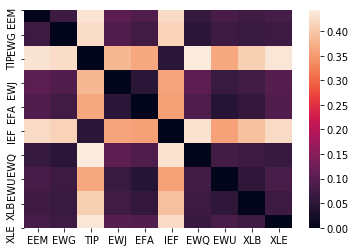

In [10]:
sns.heatmap(gnpr_matrix_dist)

### Heatmap of GNPR mix of distribution and information distance

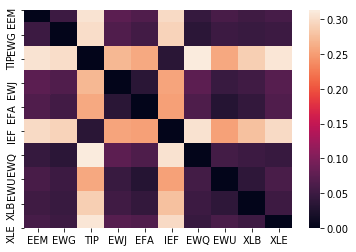

In [11]:
sns.heatmap(gnpr_matrix_mix)

### Heatmap of GNPR dependence information distance

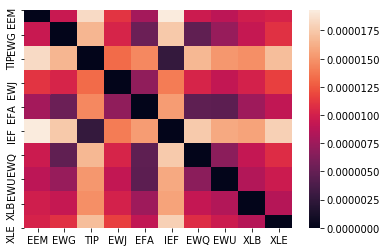

In [12]:
sns.heatmap(gnpr_matrix_dep)

As seen from the heat maps of GNPR distance matrices, distribution and information distances show different types of codependency. However, when using a mixed approach with $\Theta = 0.5$ the distribution information part is too high, which makes the dependence information adjustment hardly visible, so for a balanced output one may want to increase $\Theta$ in this particular example. 

## Conclusion

This notebook describes the GPR and the GNPR distances how they may be used in real-life applications.  

These novel distances were originally presented by the _Gautier Marti_ in the work __“Some contributions to the clustering of financial time series and applications to credit default swaps”__  [available here](https://www.researchgate.net/publication/322714557).

Key takeaways from the notebook:
- Distances can be roughly classified in two families:
  - Distributional distances, which focus on dissimilarity between probability distributions and quantify divergences in marginal behaviours.
  - Dependence distances, which focus on the joint behaviours of random variables, generally ignoring their distribution properties.
- Distance $d_{\Theta}$ between two random variables allows to discriminate random variables both on distribution and dependence.
- Distance $d_{\Theta}$ is a metric that falls in range $[0, 1]$.
- GPR distance is a fast and good proxy for distance $d_{\Theta}$ between two Gaussians.
- GNPR distance is a proxy for distance $d_{\Theta}$ that works on i.i.d. random variables, it requires a declared width of bins for values discretization.
- $d_{\Theta}$ should be chosen to reflect the balance of dependence and distribution information in the data.